In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [33]:
tpot_train_data = pd.read_csv('final_train.csv', sep=',')
# drop first 2 columns
tpot_train_data = tpot_train_data.drop(tpot_train_data.columns[[0, 1]], axis=1)
## conver tpot_train_data to np.float64
tpot_train_data = tpot_train_data.astype(np.float64)
training_features, training_target = tpot_train_data.drop('is_positive', axis=1), tpot_train_data['is_positive']

# NOTE: Make sure that the outcome column is labeled 'is_positive' in the data file
tpot_test_data = pd.read_csv('final_test.csv', sep=',')

# drop first 2 columns
tpot_test_data = tpot_test_data.drop(tpot_test_data.columns[[0, 1]], axis=1)
## conver tpot_test_data to np.float64
tpot_test_data = tpot_test_data.astype(np.float64)

features = tpot_test_data.drop('is_positive', axis=1)
testing_features, testing_target = features, tpot_test_data['is_positive']



C:\Users\Gan Jing Hao\AppData\Local\Temp\ipykernel_7088\1579947156.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tpot_train_data = pd.read_csv('final_train.csv', sep=',')


In [30]:
testing_features

,smoker,asthma,cough,cold,diabetes,hypertension,ischemic_heart_disease,breathing_difficulties,sore_throat,fatigue,...,vowel-o_mfccs_31_mean,vowel-o_mfccs_32_mean,vowel-o_mfccs_33_mean,vowel-o_mfccs_34_mean,vowel-o_mfccs_35_mean,vowel-o_mfccs_36_mean,vowel-o_mfccs_37_mean,vowel-o_mfccs_38_mean,vowel-o_mfccs_39_mean,vowel-o_mfccs_40_mean
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,8.588036,11.959126,14.215542,10.775084,5.392967,2.694029,-0.865406,-3.381723,-2.425353,-1.026012
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.999691,4.039358,-3.646697,-2.075934,3.296728,-5.849725,-3.085097,-1.402914,-2.872846,-0.325060
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.111135,-0.286740,3.357653,8.340874,7.091744,9.194350,7.878199,3.022198,2.879444,2.332690
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.689796,3.003401,-6.150553,-1.915555,-2.238412,-1.800354,-4.185455,-6.014500,-3.879953,-4.123515
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.648485,1.994415,2.352676,0.604499,0.014954,0.832177,0.525671,-0.747196,-0.066013,-0.334404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.240603,-3.024102,-3.542433,-1.884778,-3.211211,-2.181338,-3.571560,-3.354987,-0.142918,0.077986
513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.380114,-2.529180,-7.501159,-5.636896,-5.694581,-3.941445,-5.189501,-3.402460,-2.845146,-4.380962
514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.582416,-0.990526,-5.539816,-2.431619,-4.672354,-0.876927,-3.624542,0.283968,-1.499251,1.186179
515,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,18.146906,11.437488,2.060987,-1.669207,-2.355475,-0.678298,3.548658,0.022771,-3.282286,-0.582486


In [31]:
# drop training_features first 24 columns
# training_features = training_features.drop(training_features.columns[0:26], axis=1)
# testing_features = training_features.drop(training_features.columns[0:26], axis=1)


In [34]:
imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)
# Average CV score on the training set was: 0.873867231034211
exported_pipeline = GradientBoostingClassifier(learning_rate=0.1, max_depth=6, max_features=0.35000000000000003, min_samples_leaf=12, min_samples_split=12, n_estimators=100, subsample=1.0)
# Fix random state in exported estimator

if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
preds = exported_pipeline.predict(testing_features)


In [ ]:
print(testing_target.value_counts())


0.0    393
1.0    124
Name: is_positive, dtype: int64


In [35]:

# Calculate evaluation metrics
accuracy = accuracy_score(testing_target, preds)
precision = precision_score(testing_target, preds)
recall = recall_score(testing_target, preds)
f1 = f1_score(testing_target, preds)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))



Accuracy: 0.9478
Precision: 0.8540
Recall: 0.9435
F1-score: 0.8966


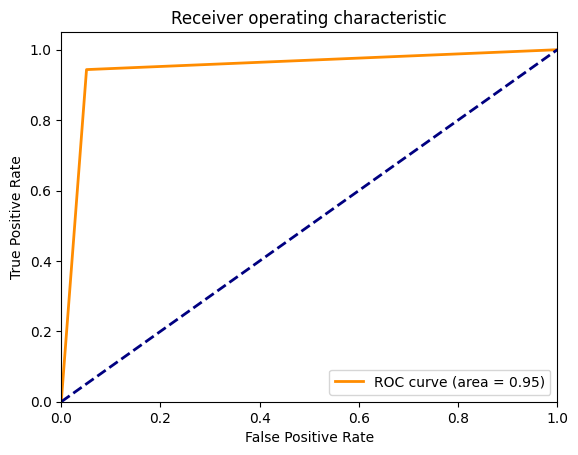

[[373  20]
 [  7 117]]


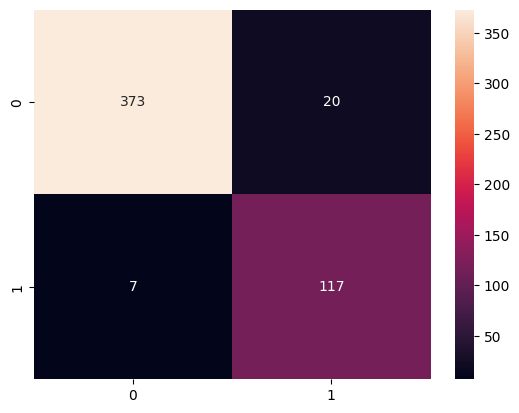

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       393
         1.0       0.85      0.94      0.90       124

    accuracy                           0.95       517
   macro avg       0.92      0.95      0.93       517
weighted avg       0.95      0.95      0.95       517



In [ ]:
# roc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(testing_target, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(testing_target, preds)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# classification report
from sklearn.metrics import classification_report
print(classification_report(testing_target, preds))

